# Demonstration of "curve"-related classes

This notebook demonstrates the functionalities of "curve"-related classes. The detailed documentation of these classes is [here](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_curves.html).

_This notebook takes about 25 minutes to read through._

## 1. Import relevant libraries

In [1]:
import numpy as np

## 2. Classes that represent a single curve

In [2]:
from PySeismoSoil.class_curves import GGmax_Curve, Damping_Curve, Stress_Curve

### 2.1. A `GGmax_Curve` class object. The data needs to be between [0, 1].

In [3]:
strain = np.geomspace(1e-2, 10, num=20)
y = strain**2
y_ = np.flipud(y) / np.max(y)
fictitious_GGmax_data = np.column_stack((strain, y_))

In [4]:
ggmax = GGmax_Curve(fictitious_GGmax_data)

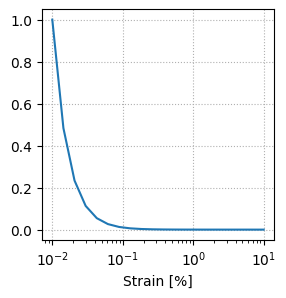

In [5]:
ggmax.plot();

In [6]:
ggmax.strain

array([ 0.01      ,  0.0143845 ,  0.02069138,  0.02976351,  0.04281332,
        0.06158482,  0.08858668,  0.1274275 ,  0.18329807,  0.26366509,
        0.37926902,  0.54555948,  0.78475997,  1.12883789,  1.62377674,
        2.33572147,  3.35981829,  4.83293024,  6.95192796, 10.        ])

In [7]:
ggmax.GGmax

array([1.00000000e+00, 4.83293024e-01, 2.33572147e-01, 1.12883789e-01,
       5.45559478e-02, 2.63665090e-02, 1.27427499e-02, 6.15848211e-03,
       2.97635144e-03, 1.43844989e-03, 6.95192796e-04, 3.35981829e-04,
       1.62377674e-04, 7.84759970e-05, 3.79269019e-05, 1.83298071e-05,
       8.85866790e-06, 4.28133240e-06, 2.06913808e-06, 1.00000000e-06])

### 2.2. A `Damping_Curve` class object.

In [8]:
strain = np.geomspace(1e-2, 10, num=20)
y = strain**2
fictitious_damping_data = np.column_stack((strain, y))

In [9]:
damping_curve = Damping_Curve(fictitious_damping_data)

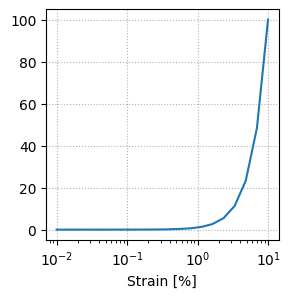

In [10]:
damping_curve.plot();

Obtain HH damping parameters ("HH_x parameters") from the damping curve:

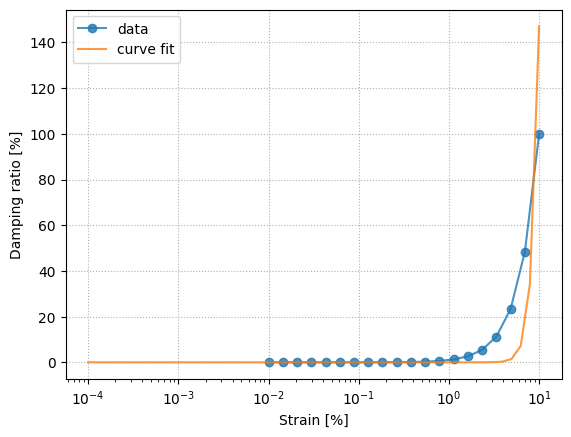

In [11]:
HH_x_param = damping_curve.get_HH_x_param(
    pop_size=30,
    n_gen=3,
    show_fig=True,
);

In [12]:
type(HH_x_param)

PySeismoSoil.class_parameters.HH_Param

`HH_x_param` is an `HH_Param` class object. For more information on that class, refer to the [documentations](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_parameters.html) and [examples](./Demo_05_Parameters.ipynb).

In [13]:
HH_x_param

{
  gamma_t: 101541.41692829177,
  a: 143373.90273711187,
  gamma_ref: 0.02933448137107758,
  beta: 0.0008929383518888022,
  s: 6.837370513558334,
  Gmax: 11263.814238352606,
  mu: 209.85228479864173,
  Tmax: 0.16161850868340472,
  d: 6425.178755537259
}

Similarly, we can obtain MKZ damping parameters ("H4_x parameters") from the damping curve:

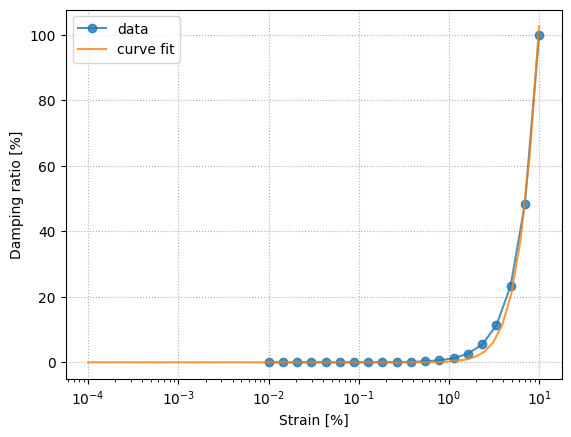

In [14]:
H4_x_param = damping_curve.get_H4_x_param(
    pop_size=30,
    n_gen=3,
    show_fig=True,
);

In [15]:
type(H4_x_param)

PySeismoSoil.class_parameters.MKZ_Param

`H4_x_param` is an `MKZ_Param` class object. For more information on that class, refer to the [documentations](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_parameters.html) and [examples](./Demo_05_Parameters.ipynb).

In [16]:
H4_x_param

{
  gamma_ref: 0.005474824843010214,
  s: 2.872462419420694,
  beta: 0.001199151040366251,
  Gmax: 1.0
}

### 2.3. A `Stress_Curve` class object.

In [17]:
strain = np.geomspace(1e-2, 10, num=20)
y = strain**2
fictitious_stress_data = np.column_stack((strain, y))

In [18]:
stress_curve = Stress_Curve(fictitious_stress_data)

In [19]:
stress_curve.strain

array([   1.        ,    1.43844989,    2.06913808,    2.97635144,
          4.2813324 ,    6.15848211,    8.8586679 ,   12.74274986,
         18.32980711,   26.36650899,   37.92690191,   54.55594781,
         78.47599704,  112.88378917,  162.37767392,  233.57214691,
        335.98182863,  483.29302386,  695.19279618, 1000.        ])

In [20]:
stress_curve.stress

array([1.00000000e-04, 2.06913808e-04, 4.28133240e-04, 8.85866790e-04,
       1.83298071e-03, 3.79269019e-03, 7.84759970e-03, 1.62377674e-02,
       3.35981829e-02, 6.95192796e-02, 1.43844989e-01, 2.97635144e-01,
       6.15848211e-01, 1.27427499e+00, 2.63665090e+00, 5.45559478e+00,
       1.12883789e+01, 2.33572147e+01, 4.83293024e+01, 1.00000000e+02])

## 3. `Multiple_Damping_Curves` class

In [21]:
from PySeismoSoil.class_curves import Multiple_Damping_Curves

### 3.1. Initialization

`Multiple_Damping_Curves` is a list-like structure consists of a list of `Damping_Curve` objects.

You can initialize a `Multiple_Damping_Curves` object like this:

In [22]:
curve1 = Damping_Curve(np.column_stack((strain, strain**1.1)))
curve2 = Damping_Curve(np.column_stack((strain, strain**1.4)))
curve3 = Damping_Curve(np.column_stack((strain, strain**1.7)))

curve_list = []
curve_list.append(curve1)
curve_list.append(curve2)
curve_list.append(curve3)

mdc = Multiple_Damping_Curves(curve_list)

In [23]:
mdc

n_layers = 3, type: <class 'PySeismoSoil.class_curves.Damping_Curve'>

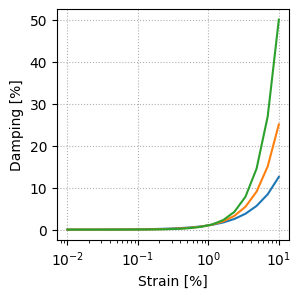

In [24]:
mdc.plot();

### 3.2. List-like behavior of object

`Multiple_Damping_Curves` objects behave similarly to a Python list. You can query its length, index into it, and append/delete elements:

In [25]:
len(mdc)

3

In [26]:
curve3 in mdc

True

In [27]:
# "`in`" checks for object ID, not object value
Damping_Curve(np.column_stack((strain, strain**1.7))) in mdc

False

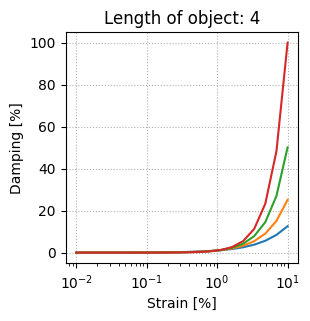

In [28]:
data4 = np.column_stack((strain, strain**2.0))
mdc.append(Damping_Curve(data4))
mdc.plot(title='Length of object: %d' % len(mdc));

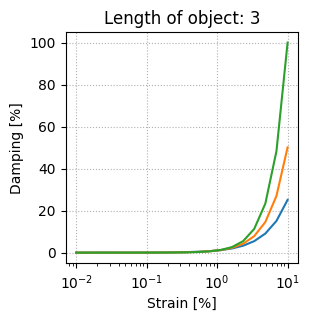

In [29]:
del mdc[0]
mdc.plot(title='Length of object: %d' % len(mdc));

Indexing:

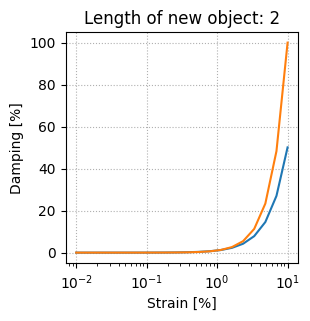

In [30]:
mdc_slice = mdc[1:]
mdc_slice.plot(title='Length of new object: %d' % mdc_slice.n_layer);

Setting elements:

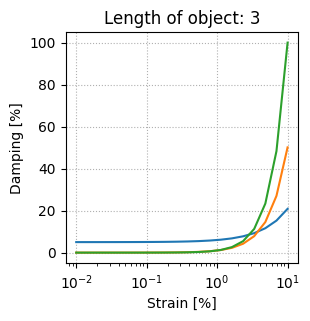

In [31]:
mdc[0] = Damping_Curve(np.column_stack((strain, strain**1.2 + 5)))
mdc.plot(title='Length of object: %d' % mdc.n_layer);

### 3.3. Obtain HH and MKZ damping parameters of all layers

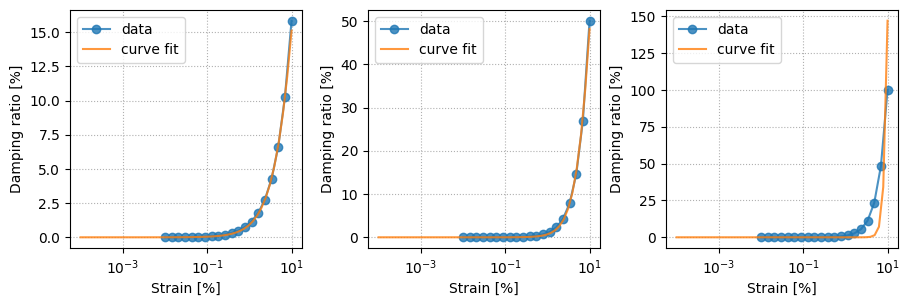

In [32]:
HH_x_params = mdc.get_all_HH_x_params(pop_size=30, n_gen=3, show_fig=True);

In [33]:
type(HH_x_params)

PySeismoSoil.class_parameters.HH_Param_Multi_Layer

For more information about the `HH_x_params` class, refer to the [documentations](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_parameters.html) and [examples](./Demo_05_Parameters.ipynb).

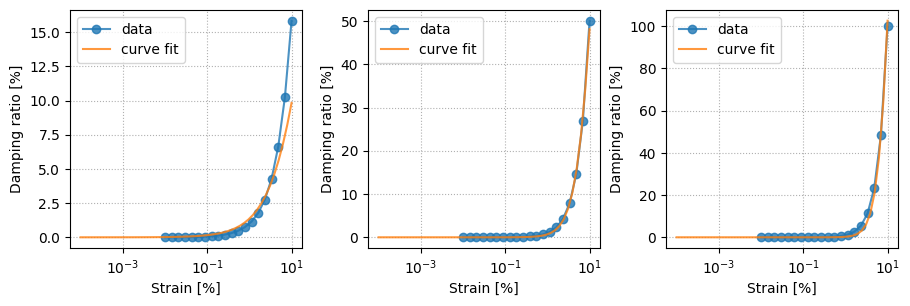

In [34]:
H4_x_params = mdc.get_all_H4_x_params(pop_size=30, n_gen=3, show_fig=True);

### 3.4. Get a "curve matrix" from a `Multiple_Damping_Curves` object

For interfacing with other parts of `PySeismoSoil`, it is convenient to pass the damping and/or G/Gmax information as a 2D numpy array (or "matrix"). The matrix should have the following format:


| strain [%] | G/Gmax | strain [%] | damping [%] |  strain [%] | G/Gmax | strain [%] | damping [%] | ... |
|:----------:|:------:|:----------:|:-----------:|:-----------:|:------:|:----------:|:-----------:|:---:|
|    ...     |  ...   |    ...     |    ...      |    ...      |  ...   |    ...     |    ...      | ... |

Every four columns contain G/Gmax and damping information of one soil layer. Subsequent layers add to the right hand side of the matrix.

Because there is no G/Gmax information in a `Multiple_Damping_Curves` object, a filler value is used.

In [35]:
curve_matrix = mdc.get_curve_matrix(GGmax_filler_value=-999)

In [36]:
np.set_printoptions(precision=4, suppress=True, linewidth=100)
curve_matrix[:10, :8]

array([[   0.01  , -999.    ,    0.01  ,    0.    ,    0.01  , -999.    ,    0.01  ,    0.    ],
       [   0.0144, -999.    ,    0.0144,    0.0022,    0.0144, -999.    ,    0.0144,    0.0003],
       [   0.0207, -999.    ,    0.0207,    0.0055,    0.0207, -999.    ,    0.0207,    0.001 ],
       [   0.0298, -999.    ,    0.0298,    0.0108,    0.0298, -999.    ,    0.0298,    0.0021],
       [   0.0428, -999.    ,    0.0428,    0.0188,    0.0428, -999.    ,    0.0428,    0.0043],
       [   0.0616, -999.    ,    0.0616,    0.0313,    0.0616, -999.    ,    0.0616,    0.0084],
       [   0.0886, -999.    ,    0.0886,    0.0506,    0.0886, -999.    ,    0.0886,    0.0158],
       [   0.1274, -999.    ,    0.1274,    0.0804,    0.1274, -999.    ,    0.1274,    0.0297],
       [   0.1833, -999.    ,    0.1833,    0.1266,    0.1833, -999.    ,    0.1833,    0.0555],
       [   0.2637, -999.    ,    0.2637,    0.198 ,    0.2637, -999.    ,    0.2637,    0.1033]])

### 3.5. Initialize a `Multiple_Damping_Curves` object from a text file

A more convenient way to initialize a `Multiple_Damping_Curves` object is from a text file, whose contents are just like the matrix shown above.

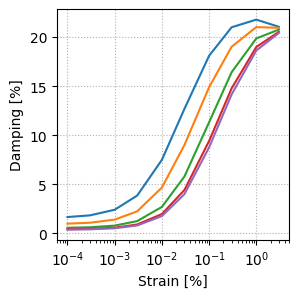

In [37]:
mdc_ = Multiple_Damping_Curves('../tests/files/curve_FKSH14.txt')
mdc_.plot();

## 4. `Multiple_GGmax_Curves` class

`Multiple_GGmax_Curves` class is very similar to `Multiple_Damping_Curves` class.

In [38]:
from PySeismoSoil.class_curves import Multiple_GGmax_Curves

### 4.1. Initialization from file

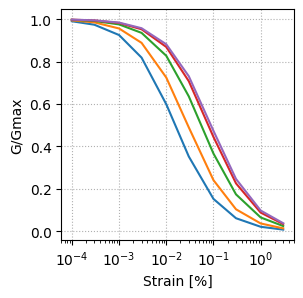

In [39]:
mgc = Multiple_GGmax_Curves('../tests/files/curve_FKSH14.txt')
mgc.plot();

It can also be initialized from a list of `GGmax_Curves` objects. Similar to what is shown above for `Multiple_Damping_Curves` class.

It also supports the list-like manipulations shown above.

However, it does not have the two `get` methods.

You can also get a "curve matrix" from it:

In [40]:
GGmax_curve_matrix = mgc.get_curve_matrix(damping_filler_value=-999)
GGmax_curve_matrix[:10, :8]

array([[   0.0001,    0.9904,    0.0001, -999.    ,    0.0001,    0.9945,    0.0001, -999.    ],
       [   0.0003,    0.974 ,    0.0003, -999.    ,    0.0003,    0.9851,    0.0003, -999.    ],
       [   0.001 ,    0.9254,    0.001 , -999.    ,    0.001 ,    0.9563,    0.001 , -999.    ],
       [   0.003 ,    0.8188,    0.003 , -999.    ,    0.003 ,    0.8885,    0.003 , -999.    ],
       [   0.01  ,    0.5991,    0.01  , -999.    ,    0.01  ,    0.725 ,    0.01  , -999.    ],
       [   0.03  ,    0.3526,    0.03  , -999.    ,    0.03  ,    0.4899,    0.03  , -999.    ],
       [   0.1   ,    0.1526,    0.1   , -999.    ,    0.1   ,    0.2411,    0.1   , -999.    ],
       [   0.3   ,    0.0616,    0.3   , -999.    ,    0.3   ,    0.1037,    0.3   , -999.    ],
       [   1.    ,    0.0212,    1.    , -999.    ,    1.    ,    0.0369,    1.    , -999.    ],
       [   3.    ,    0.0078,    3.    , -999.    ,    3.    ,    0.0138,    3.    , -999.    ]])

## 5. `Multiple_GGmax_Damping_Curves` class

This is a meta-class that contains the information of both G/Gmax curves and damping curves.

In [41]:
from PySeismoSoil.class_curves import Multiple_GGmax_Damping_Curves

### 5.1. Initialization from a text file

In [42]:
mgdc = Multiple_GGmax_Damping_Curves(data='../tests/files/curve_FKSH14.txt')

In [43]:
mgdc.n_layer

5

You can retrieve both G/Gmax and damping curve information:

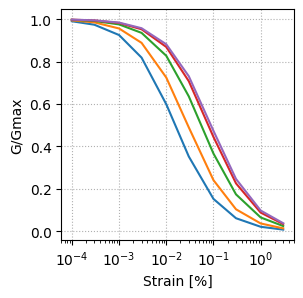

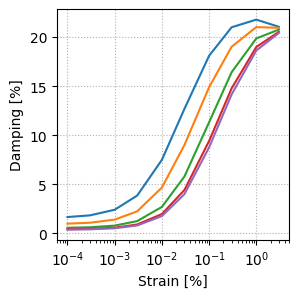

In [44]:
mgc__, mdc__ = mgdc.get_MGC_MDC_objects()
mgc__.plot()
mdc__.plot();

You can get a full (i.e., without dummy values) "curve matrix":

In [45]:
full_curves = mgdc.get_curve_matrix()
full_curves[:10, :8]

array([[ 0.0001,  0.9904,  0.0001,  1.6683,  0.0001,  0.9945,  0.0001,  0.9946],
       [ 0.0003,  0.974 ,  0.0003,  1.8386,  0.0003,  0.9851,  0.0003,  1.0872],
       [ 0.001 ,  0.9254,  0.001 ,  2.4095,  0.001 ,  0.9563,  0.001 ,  1.4039],
       [ 0.003 ,  0.8188,  0.003 ,  3.8574,  0.003 ,  0.8885,  0.003 ,  2.2497],
       [ 0.01  ,  0.5991,  0.01  ,  7.4976,  0.01  ,  0.725 ,  0.01  ,  4.6738],
       [ 0.03  ,  0.3526,  0.03  , 12.686 ,  0.03  ,  0.4899,  0.03  ,  9.0012],
       [ 0.1   ,  0.1526,  0.1   , 18.102 ,  0.1   ,  0.2411,  0.1   , 14.898 ],
       [ 0.3   ,  0.0616,  0.3   , 21.005 ,  0.3   ,  0.1037,  0.3   , 19.02  ],
       [ 1.    ,  0.0212,  1.    , 21.783 ,  1.    ,  0.0369,  1.    , 21.021 ],
       [ 3.    ,  0.0078,  3.    , 21.052 ,  3.    ,  0.0138,  3.    , 20.947 ]])

### 5.2. Initialization from a `Multiple_GGmax_Curves` and a `Multiple_Damping_Curves` object

In [46]:
mgdc_ = Multiple_GGmax_Damping_Curves(mgc_and_mdc=(mgc__, mdc__))

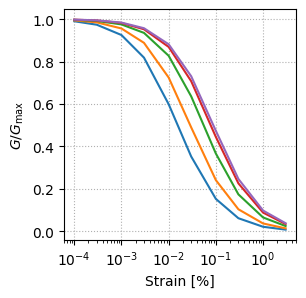

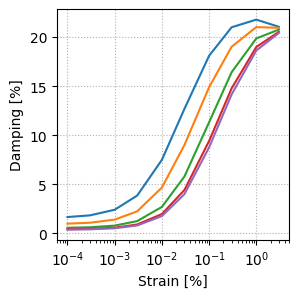

In [47]:
mgdc_.plot();